In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [ ]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df = df.loc[df['행정구'] == '강남구'].reset_index(drop = True)
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,신사동,19,4,0,9,1,14,0,1,...,NaN,870,1569,4263,5235,1840,2165,15942,3,2
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,50.0,614,834,10127,6577,2167,1977,22296,2,2
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,50.0,986,1263,7565,6761,2202,2114,20891,1,0
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,50.0,1899,2706,5820,8665,3153,3704,25947,1,0
4,강남구,청담동,6,4,0,5,1,13,0,0,...,53.0,1867,2245,7380,8551,2960,2459,25462,1,0
5,강남구,삼성1동,21,3,0,2,3,22,2,0,...,59.0,769,1210,3552,4240,1666,1410,12847,1,0
6,강남구,삼성2동,6,1,0,1,3,17,0,0,...,51.0,2181,3680,8787,11196,2623,2600,31067,6,6
7,강남구,대치1동,2,0,0,2,2,6,0,0,...,55.0,1576,5311,3687,9542,2082,1670,23868,0,0
8,강남구,대치2동,9,3,0,0,1,16,1,0,...,55.0,2066,6313,7627,13476,4516,3190,37188,2,0
9,강남구,대치4동,25,8,0,4,4,24,0,0,...,49.0,635,2454,6562,7070,1563,1393,19677,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             22 non-null     object 
 1   행정동             22 non-null     object 
 2   갈비/삼겹살          22 non-null     int64  
 3   곱창/양구이전문        22 non-null     int64  
 4   기사식당            22 non-null     int64  
 5   기타고기요리          22 non-null     int64  
 6   냉면집             22 non-null     int64  
 7   닭/오리요리          22 non-null     int64  
 8   돌솥/비빕밥전문점       22 non-null     int64  
 9   두부요리전문          22 non-null     int64  
 10  버섯전문점           22 non-null     int64  
 11  별식/퓨전요리         22 non-null     int64  
 12  보리밥전문           22 non-null     int64  
 13  부대찌개/섞어찌개       22 non-null     int64  
 14  부페              22 non-null     int64  
 15  분식              22 non-null     int64  
 16  설렁탕집            22 non-null     int64  
 17  순두부전문           22 non-null     int64

- 총 72개의 컬럼
- 강남구의 경우 22개의 행정동 -> 각 컬럼마다 **22개**의 데이터가 존재해야 한다.
- 일부 결측치가 존재함을 확인할 수 있다.

In [ ]:
df.loc[df['운영점포영업개월'].isna(),:]

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,신사동,19,4,0,9,1,14,0,1,...,NaN,870,1569,4263,5235,1840,2165,15942,3,2


- 전처리 시 이름이 같은 행정동을 drop해서 관악구 신사동은 있지만 강남구 신사동은 결측이 생긴 것 같아용..
- 강남구 신사동과 지리적으로 가까운 압구정동으로 데이터 대체

In [ ]:
df['상권변화지표']  = np.where(df['행정동'] == '신사동',df.loc[df['행정동'] == '압구정동','상권변화지표'], df['상권변화지표'])
df['운영점포영업개월']  = np.where(df['행정동'] == '신사동',df.loc[df['행정동'] == '압구정동','운영점포영업개월'], df['운영점포영업개월'])
df['폐업점포영업개월']  = np.where(df['행정동'] == '신사동',df.loc[df['행정동'] == '압구정동','폐업점포영업개월'], df['폐업점포영업개월'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             22 non-null     object 
 1   행정동             22 non-null     object 
 2   갈비/삼겹살          22 non-null     int64  
 3   곱창/양구이전문        22 non-null     int64  
 4   기사식당            22 non-null     int64  
 5   기타고기요리          22 non-null     int64  
 6   냉면집             22 non-null     int64  
 7   닭/오리요리          22 non-null     int64  
 8   돌솥/비빕밥전문점       22 non-null     int64  
 9   두부요리전문          22 non-null     int64  
 10  버섯전문점           22 non-null     int64  
 11  별식/퓨전요리         22 non-null     int64  
 12  보리밥전문           22 non-null     int64  
 13  부대찌개/섞어찌개       22 non-null     int64  
 14  부페              22 non-null     int64  
 15  분식              22 non-null     int64  
 16  설렁탕집            22 non-null     int64  
 17  순두부전문           22 non-null     int64

- 결측치가 없음을 확인할 수 있다.

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

**✔ df.corr() 적용 시 NaN**
- 피어쓴 상관계수 계산 식은 아래와 같음
- 따라서, 모든 행의 데이터 값이 동일한 경우 표준편차가 0이 되어 분모가 0으로 계산된다. 
    - 이로 인해, 원본 데이터에 결측치가 없어도 NaN이 발생될 수 있다.

![corr](pearson.jpg)

In [ ]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,업종,상관계수,변수


In [ ]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [ ]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 강남구**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [ ]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,강남구,신사동,19,4,0,9,1,14,0,1,...,307234.8407,73837.84795,69567.75375,808447.8394,33092.75991,73378.35493,320576.9962,251809.4872,64752.42005,64837.82395
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,355165.0245,73639.08934,65632.47822,882575.8582,28359.23711,44362.54853,424420.6999,261870.7460,64077.14275,59485.48471
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,402037.8510,74349.25777,72430.00757,816792.9894,44715.22596,47811.42834,330340.8770,267398.3533,62433.11963,64093.98606
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,345909.9547,86264.81401,93886.73765,955573.8298,67562.69875,87544.66691,339882.1703,294670.3864,77452.82345,88461.08194
4,강남구,청담동,6,4,0,5,1,13,0,0,...,368313.6780,96091.84484,76322.11460,903778.7168,55867.64328,64514.47803,324010.2697,302041.1235,86199.59789,71145.60309


In [ ]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.846231,0.813792,-0.119713,0.796070,0.489572,0.867794,0.705620,0.725789,NaN,0.870757,...,0.939214,0.905344,0.402821,0.917355,0.059871,0.910519,0.918784,0.670814,0.839906,-0.100907
10대 미만 생활인구_평일,-0.182718,-0.231899,-0.077802,-0.154504,-0.074360,-0.038356,-0.138094,-0.167158,NaN,-0.124756,...,0.130246,-0.123289,0.560491,-0.131162,-0.221232,-0.068757,-0.121059,-0.015902,-0.175998,-0.092957
10대 생활인구_평일,-0.029040,-0.046834,-0.088221,-0.055039,0.178853,0.045640,0.089291,-0.023288,NaN,0.075977,...,0.156858,0.039895,0.184130,0.026686,0.136793,0.076659,-0.006322,0.134353,-0.035789,0.100511
20~30대 생활인구_평일,0.919612,0.902588,-0.096788,0.861988,0.487982,0.907640,0.735583,0.787521,NaN,0.916698,...,0.929587,0.949675,0.310195,0.967303,0.080372,0.945721,0.974526,0.700027,0.910228,-0.109749
40~50대 생활인구_평일,0.841632,0.800094,-0.116384,0.784512,0.529848,0.859018,0.728282,0.705895,NaN,0.862318,...,0.937355,0.915380,0.347477,0.919773,0.041025,0.907354,0.919349,0.647641,0.843817,-0.106477
60대 생활인구_평일,0.684244,0.661929,-0.114160,0.693650,0.272846,0.742148,0.581345,0.667662,NaN,0.742778,...,0.824937,0.758347,0.531685,0.785104,0.025642,0.774394,0.786711,0.520599,0.680894,-0.094011
70대 이상 생활인구_평일,0.490773,0.432713,-0.119762,0.533081,0.179857,0.529384,0.318474,0.470966,NaN,0.521903,...,0.650236,0.546286,0.535608,0.567466,0.011155,0.581221,0.567660,0.360407,0.462533,-0.038391
총생활인구수_주말,0.763429,0.727362,-0.138556,0.750357,0.432561,0.798227,0.613356,0.655977,NaN,0.806551,...,0.887695,0.824705,0.454840,0.845231,0.054239,0.835065,0.839712,0.664580,0.738906,-0.089474
10대 미만 생활인구_주말,-0.061816,-0.120548,-0.071157,-0.045999,-0.009535,0.075106,-0.017238,-0.068312,NaN,-0.002128,...,0.242752,0.008360,0.608381,-0.008987,-0.195632,0.050912,-0.000861,0.068866,-0.067339,-0.088168
10대 생활인구_주말,0.065037,0.053092,-0.076198,0.026288,0.245097,0.135218,0.157776,0.021505,NaN,0.171202,...,0.232843,0.133268,0.183120,0.117732,0.190990,0.155818,0.081453,0.204080,0.054637,0.152906


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_평일,0.919612
1,갈비/삼겹살,20~30대 생활인구_주말,0.917576
2,갈비/삼겹살,총생활인구수_평일,0.846231
3,갈비/삼겹살,40~50대 생활인구_평일,0.841632
4,갈비/삼겹살,총생활인구수_주말,0.763429
...,...,...,...
241,해장국/감자탕,총생활인구수_주말,0.738906
242,해장국/감자탕,40~50대 생활인구_주말,0.690247
243,해장국/감자탕,60대 생활인구_평일,0.680894
244,해장국/감자탕,60대 생활인구_주말,0.495486


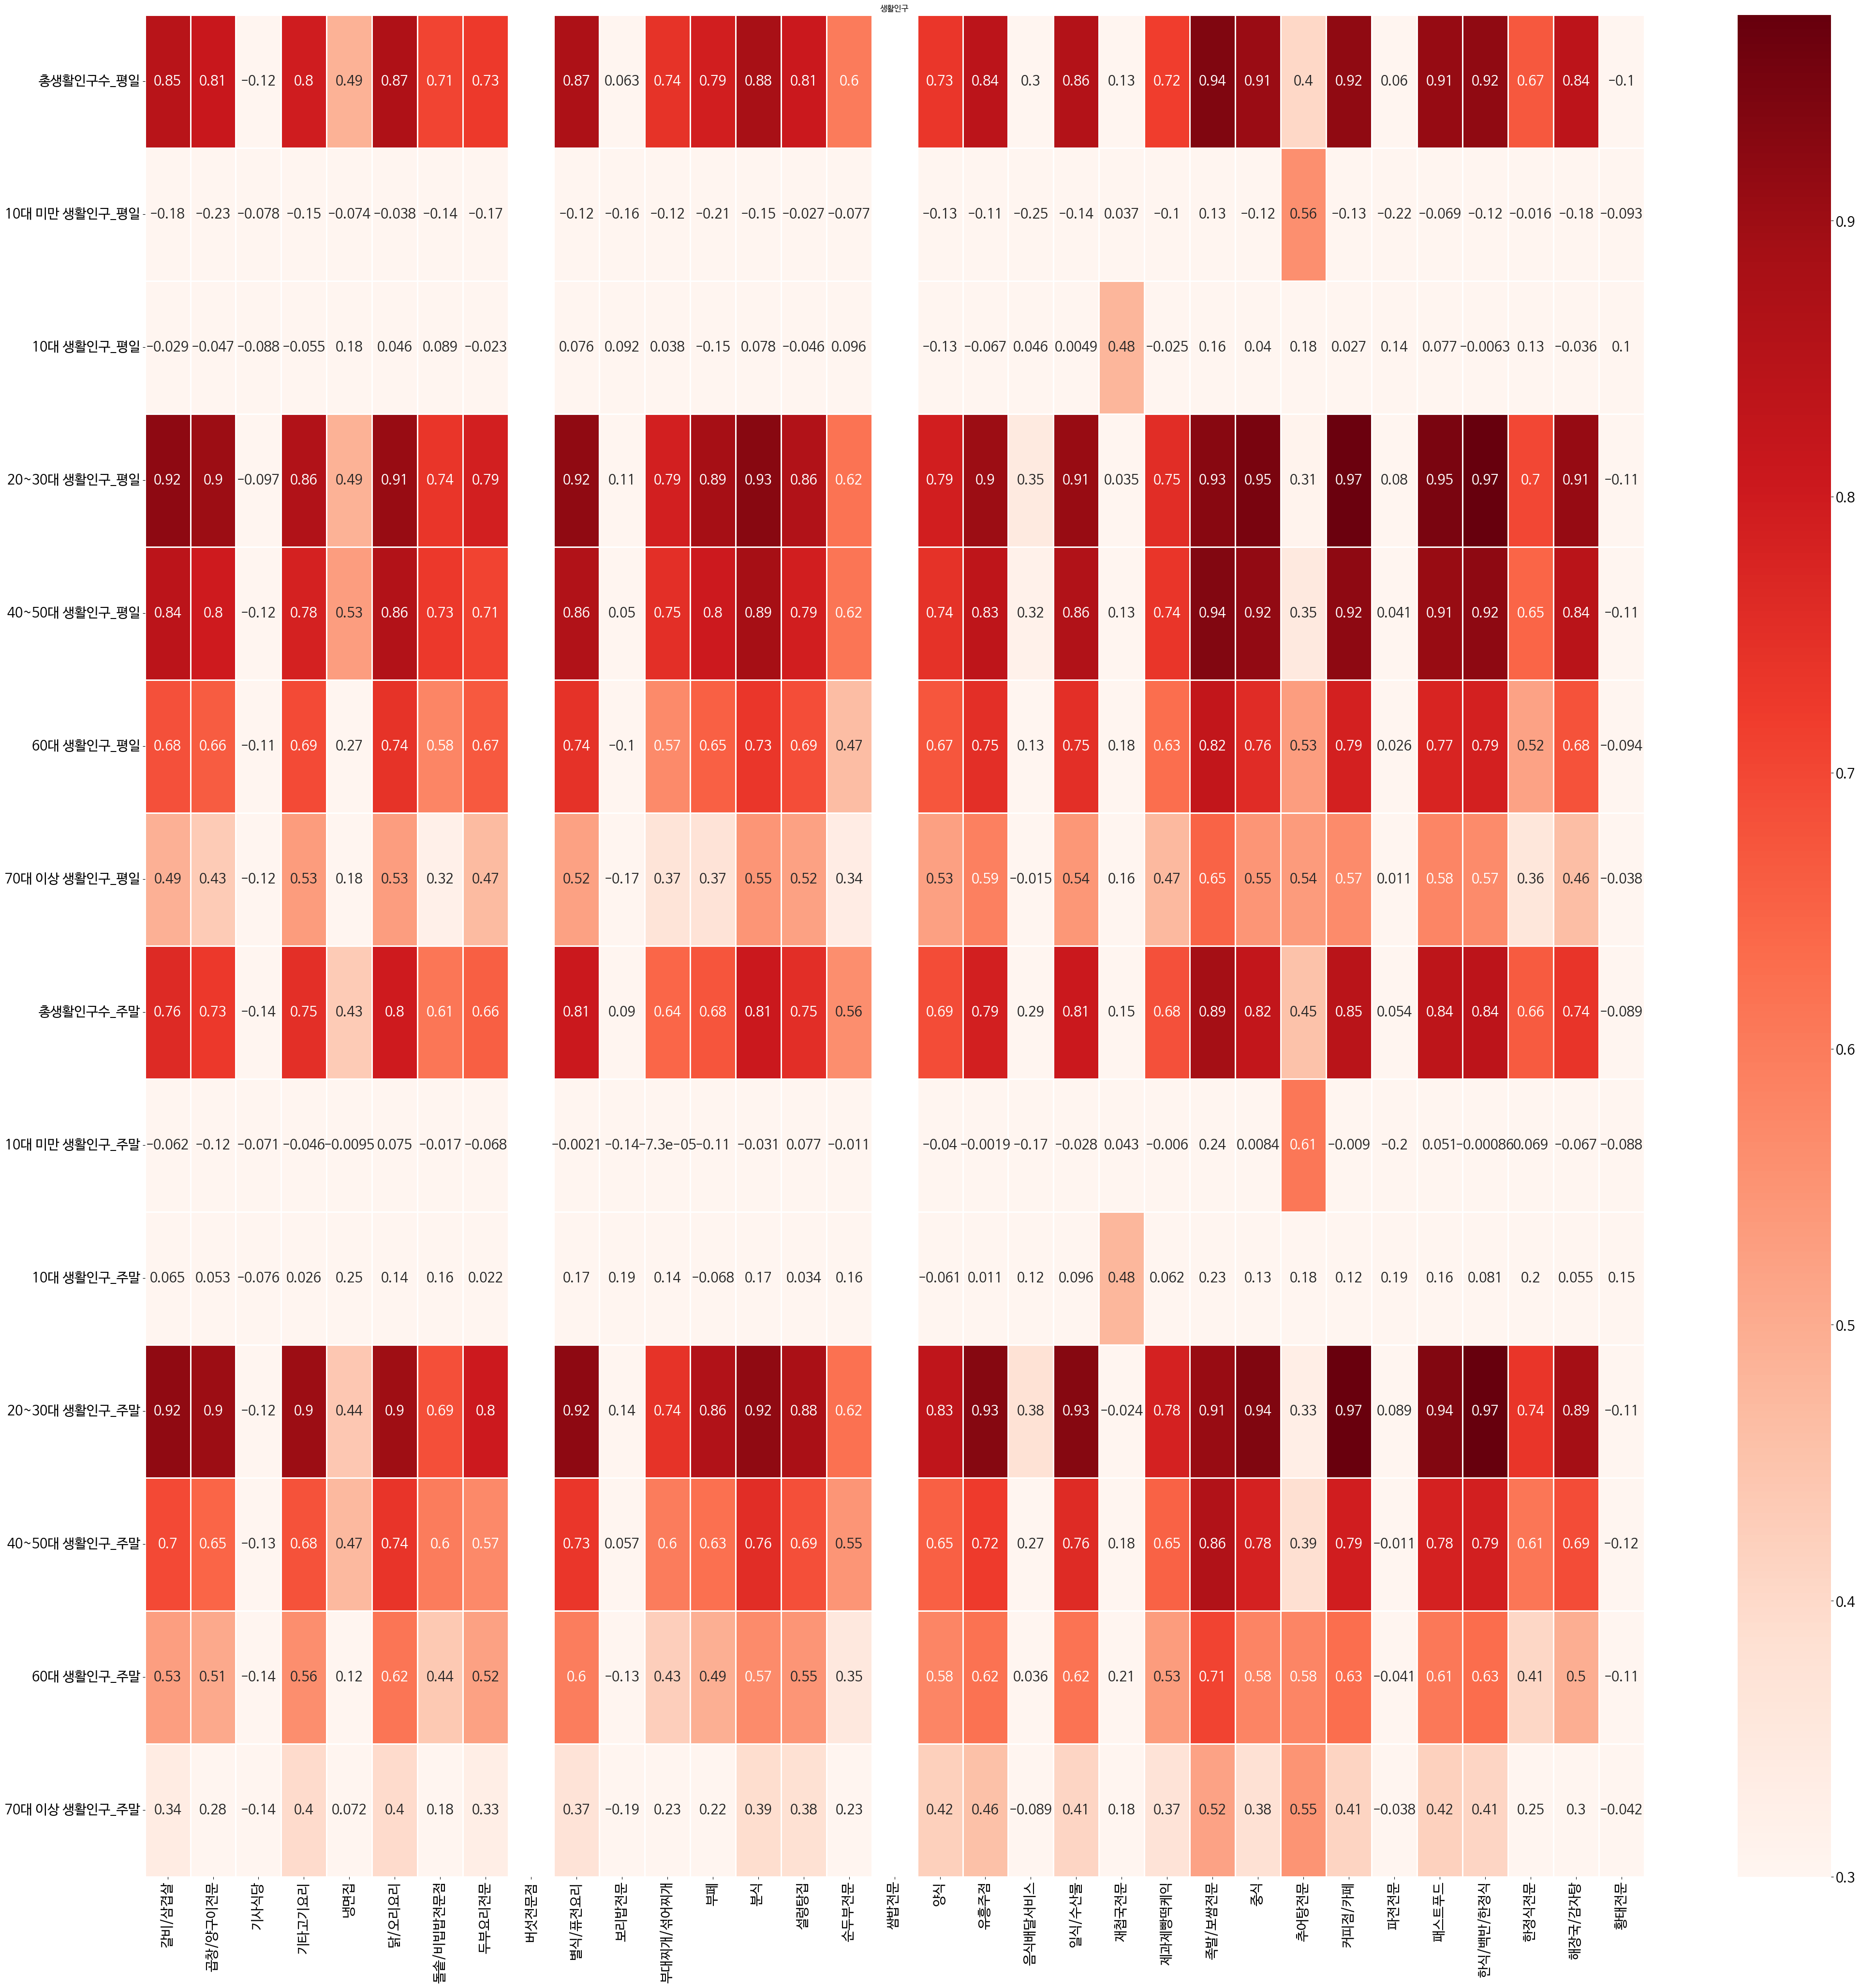

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [ ]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살       10
곱창/양구이전문      9
기타고기요리       10
냉면집           6
닭/오리요리       10
돌솥/비빕밥전문점     9
두부요리전문       10
별식/퓨전요리      10
부대찌개/섞어찌개     9
부페            9
분식           10
설렁탕집         10
순두부전문         9
양식           10
유흥주점         10
음식배달서비스       3
일식/수산물       10
재첩국전문         2
제과제빵떡케익      10
족발/보쌈전문      10
중식           10
추어탕전문        12
커피점/카페       10
패스트푸드        10
한식/백반/한정식    10
한정식전문         9
해장국/감자탕       9
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **b) 대학정보**

In [ ]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,강남구,신사동,19,4,0,9,1,14,0,1,...,163,1,27,161,2,3,0,0,0,0
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,152,0,26,232,3,6,0,0,0,0
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,173,0,50,293,1,6,0,1,1,0
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,171,0,38,209,0,4,0,0,0,0
4,강남구,청담동,6,4,0,5,1,13,0,0,...,128,0,19,209,1,3,0,0,0,0


In [ ]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),0.277784,0.202772,-0.06514,0.124903,0.43566,0.224714,-0.109954,-0.06514,NaN,0.101338,...,0.293132,0.175555,-0.126837,0.161708,-0.123443,0.223309,0.244905,0.035635,0.173401,-0.069007
일반대학,0.277784,0.202772,-0.06514,0.124903,0.43566,0.224714,-0.109954,-0.06514,NaN,0.101338,...,0.293132,0.175555,-0.126837,0.161708,-0.123443,0.223309,0.244905,0.035635,0.173401,-0.069007
온라인대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_univ = selection(univ_corr)
result_univ.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,냉면집,대학교(전체),0.435660
1,냉면집,일반대학,0.435660
2,부대찌개/섞어찌개,대학교(전체),0.404574
3,부대찌개/섞어찌개,일반대학,0.404574


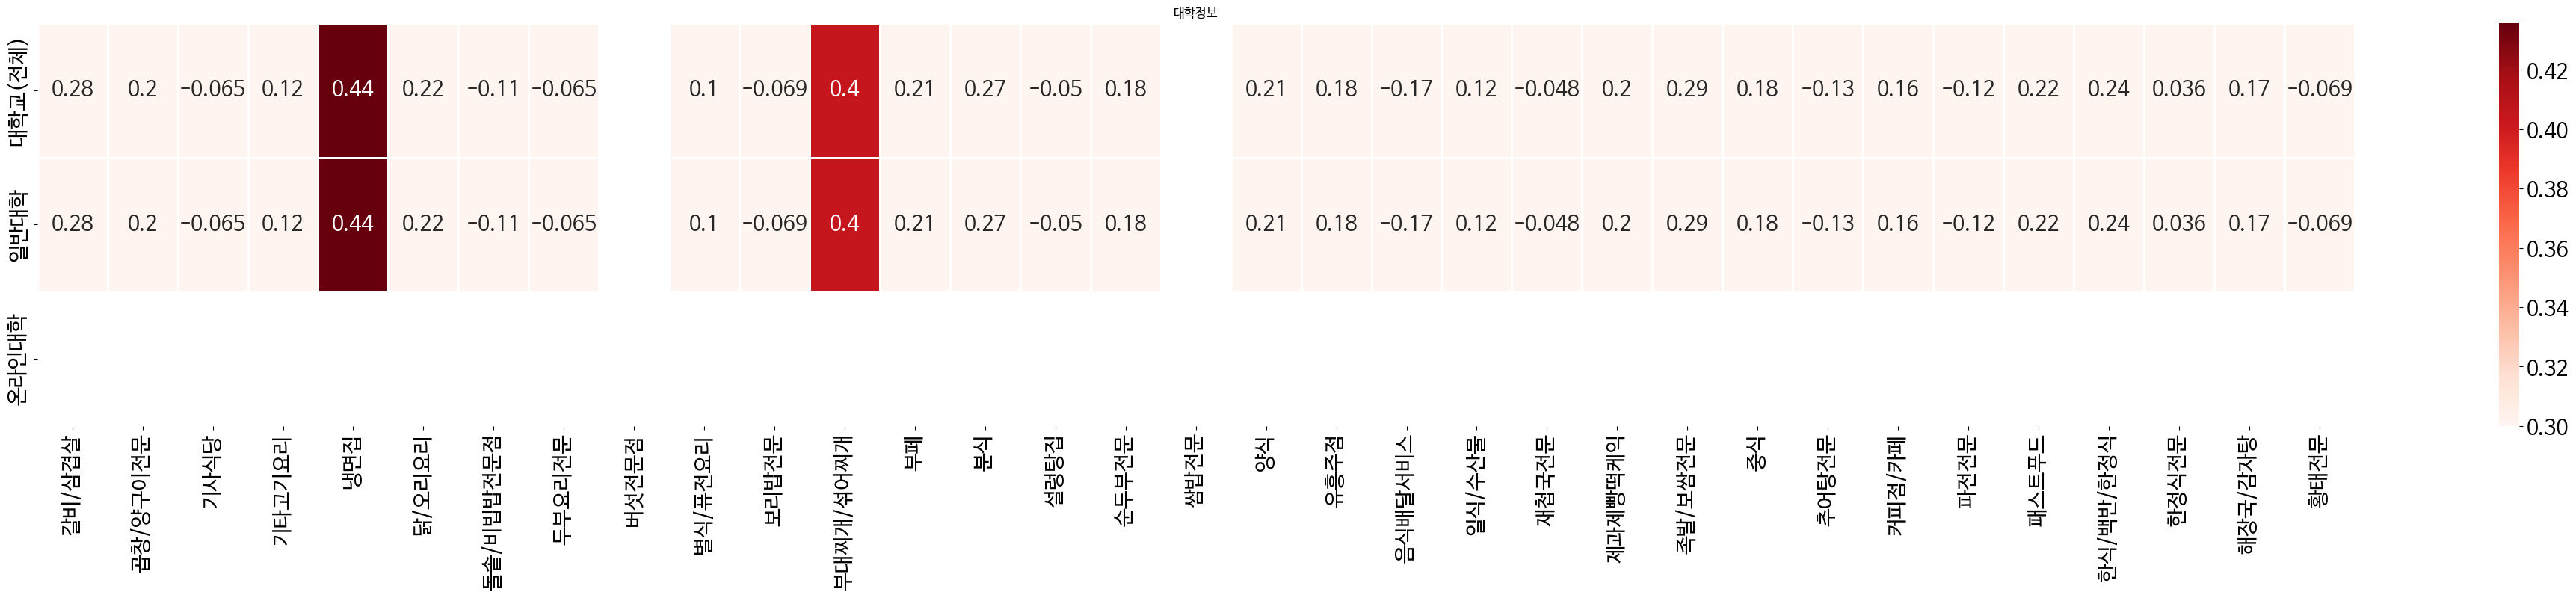

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(univ_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("대학정보")
plt.show()

In [ ]:
result_univ.groupby('업종')['변수'].count()

업종
냉면집          2
부대찌개/섞어찌개    2
Name: 변수, dtype: int64

- 대학정보 데이터의 전체 변수 개수: **3개**
- 대학정보 데이터의 경우 변수들과의 상관계수가 0.3 이상인 업종은 **냉면집**과 **부대찌개/섞어찌개 전문점**이다.
- 대학가 주변에는 냉면집과 부대찌개/섞어찌개 전문점이 상당히 많이 분포하고 있다고 해석될 수 있다.
    - 하지만, 강남구에 존재하는 대학의 수는 **1개**이기 때문에, 대학 수가 업종들의 업소 수에 영향을 미친다고 단정짓기는 힘들다.

### **c) 초중고학교정보**

In [ ]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,강남구,신사동,19,4,0,9,1,14,0,1,...,1,27,161,2,3,0,3,1,1,1
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,0,26,232,3,6,0,1,1,0,0
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,0,50,293,1,6,0,2,1,1,0
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,0,38,209,0,4,0,5,1,2,2
4,강남구,청담동,6,4,0,5,1,13,0,0,...,0,19,209,1,3,0,4,2,1,1


In [ ]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),-0.372535,-0.422431,8.261576e-02,-0.306848,-0.205624,-0.268541,-0.225778,-0.270796,NaN,-0.331017,...,-0.213998,-0.316954,0.219846,-0.331742,-0.022831,-0.275692,-0.345617,-0.335193,-0.424817,0.007293
초등학교,-0.191331,-0.119875,7.810913e-02,-0.188534,-0.309395,0.090233,-0.136276,-0.124056,NaN,-0.168198,...,0.065474,-0.221295,0.526046,-0.168421,-0.019591,-0.130288,-0.165420,-0.139499,-0.172634,0.029204
중학교,-0.288290,-0.419342,1.119877e-01,-0.198155,0.082619,-0.345816,-0.123651,-0.277022,NaN,-0.256169,...,-0.195979,-0.163408,-0.034430,-0.223391,-0.033508,-0.197884,-0.242699,-0.309537,-0.343376,-0.018732
고등학교,-0.380685,-0.460555,9.715433e-18,-0.313214,-0.192414,-0.413596,-0.253218,-0.233357,NaN,-0.340341,...,-0.393790,-0.330018,-0.068156,-0.371253,0.000000,-0.308686,-0.389409,-0.335099,-0.473527,0.000000


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,초중고(전체),-0.372535
1,갈비/삼겹살,고등학교,-0.380685
2,곱창/양구이전문,중학교,-0.419342
3,곱창/양구이전문,초중고(전체),-0.422431
4,곱창/양구이전문,고등학교,-0.460555
5,기타고기요리,초중고(전체),-0.306848
6,기타고기요리,고등학교,-0.313214
7,냉면집,초등학교,-0.309395
8,닭/오리요리,중학교,-0.345816
9,닭/오리요리,고등학교,-0.413596


In [ ]:
result_school.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     3
기타고기요리       2
냉면집          1
닭/오리요리       2
별식/퓨전요리      2
보리밥전문        3
부대찌개/섞어찌개    2
부페           3
분식           2
설렁탕집         3
유흥주점         1
일식/수산물       1
족발/보쌈전문      1
중식           2
추어탕전문        1
커피점/카페       2
패스트푸드        1
한식/백반/한정식    2
한정식전문        3
해장국/감자탕      3
Name: 변수, dtype: int64

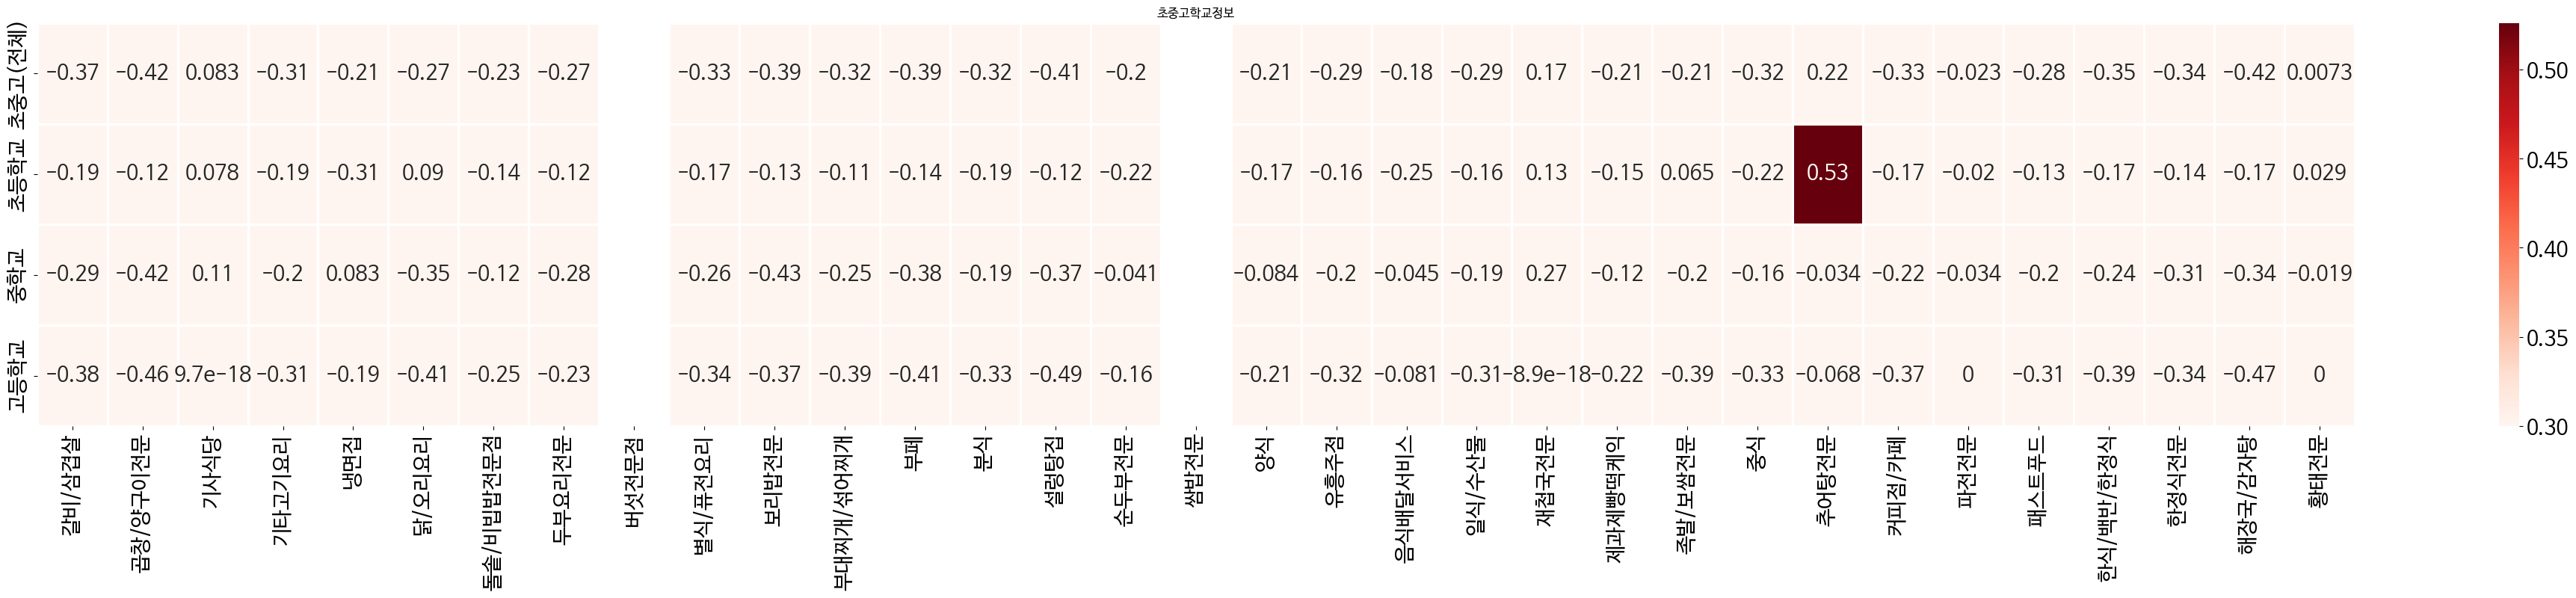

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **강남구**에서는 초중고학교정보 데이터는 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **d) 소득정보**

In [ ]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,강남구,신사동,19,4,0,9,1,14,0,1,...,1,27,161,2,3,0,24976,9343,2.67,14764.935
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,0,26,232,3,6,0,22095,12828,1.72,13078.130
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,0,50,293,1,6,0,20669,10294,2.01,13078.130
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,0,38,209,0,4,0,24976,9343,2.67,14764.935
4,강남구,청담동,6,4,0,5,1,13,0,0,...,0,19,209,1,3,0,25054,10434,2.40,14058.200


In [ ]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,0.240165,0.218913,-0.069703,0.243180,0.206859,0.358639,0.187712,0.278161,NaN,0.256512,...,0.489889,0.281371,0.570809,0.337580,-0.184692,0.335064,0.318454,0.391737,0.315197,-0.243682
총가구수,0.625750,0.653025,-0.036558,0.594103,0.332643,0.736200,0.419449,0.559646,NaN,0.608093,...,0.795781,0.623091,0.636220,0.681286,-0.002171,0.684232,0.684563,0.670216,0.704517,-0.106939
가구당인구수,-0.627947,-0.726702,-0.143333,-0.562396,-0.243251,-0.677740,-0.341117,-0.354997,NaN,-0.536324,...,-0.573576,-0.551977,-0.245366,-0.559053,-0.316059,-0.546281,-0.594406,-0.461396,-0.675852,-0.346763
평균소득금액,0.463928,0.414688,0.049941,0.584091,0.429001,0.447319,0.430051,0.311882,NaN,0.494359,...,0.506403,0.589870,-0.028070,0.582790,0.295818,0.497722,0.541857,0.313334,0.457618,0.143236


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,총가구수,0.625750
1,갈비/삼겹살,평균소득금액,0.463928
2,갈비/삼겹살,가구당인구수,-0.627947
3,곱창/양구이전문,총가구수,0.653025
4,곱창/양구이전문,평균소득금액,0.414688
...,...,...,...
82,해장국/감자탕,총가구수,0.704517
83,해장국/감자탕,평균소득금액,0.457618
84,해장국/감자탕,총인구수,0.315197
85,해장국/감자탕,가구당인구수,-0.675852


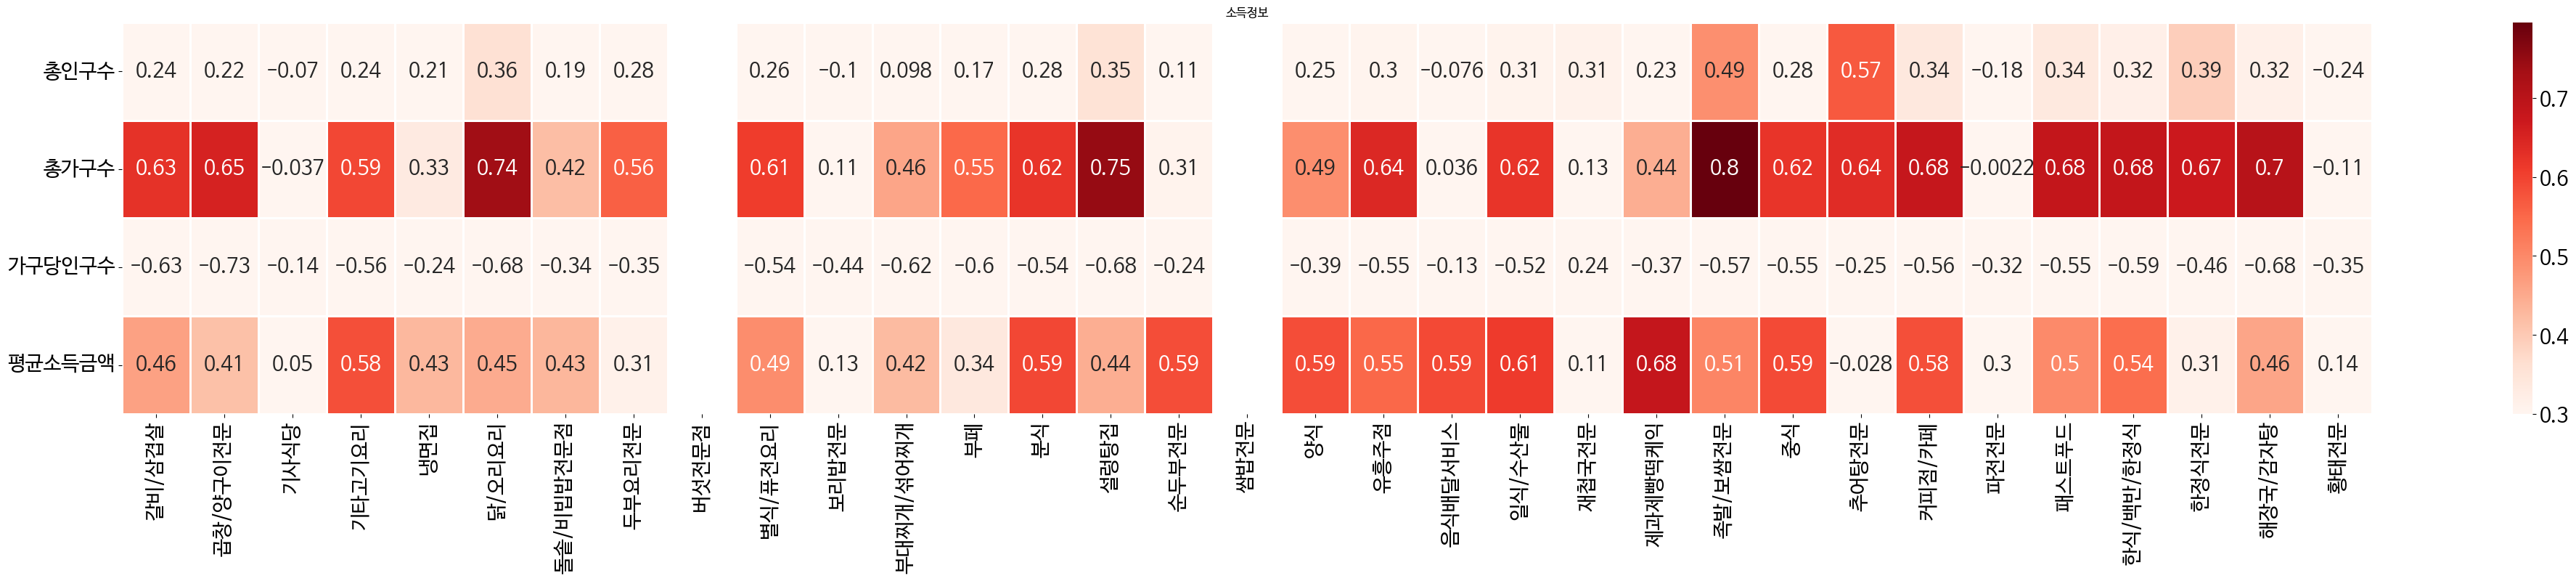

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [ ]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       3
곱창/양구이전문     3
기타고기요리       3
냉면집          2
닭/오리요리       4
돌솥/비빕밥전문점    3
두부요리전문       3
별식/퓨전요리      3
보리밥전문        1
부대찌개/섞어찌개    3
부페           3
분식           3
설렁탕집         4
순두부전문        2
양식           3
유흥주점         4
음식배달서비스      1
일식/수산물       4
재첩국전문        1
제과제빵떡케익      3
족발/보쌈전문      4
중식           3
추어탕전문        2
커피점/카페       4
파전전문         1
패스트푸드        4
한식/백반/한정식    4
한정식전문        4
해장국/감자탕      4
황태전문         1
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 상당수의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강남구**에서 소득정보 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **e) 상권변화지표**

In [ ]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,강남구,신사동,19,4,0,9,1,14,0,1,...,163,1,27,161,2,3,0,LL,115.0,50.0
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,152,0,26,232,3,6,0,LL,113.0,50.0
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,173,0,50,293,1,6,0,LL,109.0,50.0
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,171,0,38,209,0,4,0,LL,115.0,50.0
4,강남구,청담동,6,4,0,5,1,13,0,0,...,128,0,19,209,1,3,0,LL,111.0,53.0


In [ ]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,-0.307754,-0.295140,0.051872,-0.333777,-0.230607,-0.454532,-0.053473,-0.126438,NaN,-0.295852,...,-0.517829,-0.296618,-0.450340,-0.336197,-0.021656,-0.339013,-0.342287,-0.416601,-0.254488,-0.043274
폐업점포영업개월,-0.471483,-0.453494,-0.027340,-0.495713,-0.421538,-0.540235,-0.125687,-0.279577,NaN,-0.427689,...,-0.546366,-0.444568,-0.264801,-0.517584,-0.015042,-0.486836,-0.495947,-0.536984,-0.489438,0.084086


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,운영점포영업개월,-0.307754
1,갈비/삼겹살,폐업점포영업개월,-0.471483
2,곱창/양구이전문,폐업점포영업개월,-0.453494
3,기타고기요리,운영점포영업개월,-0.333777
4,기타고기요리,폐업점포영업개월,-0.495713
5,냉면집,폐업점포영업개월,-0.421538
6,닭/오리요리,운영점포영업개월,-0.454532
7,닭/오리요리,폐업점포영업개월,-0.540235
8,별식/퓨전요리,폐업점포영업개월,-0.427689
9,부대찌개/섞어찌개,폐업점포영업개월,-0.323810


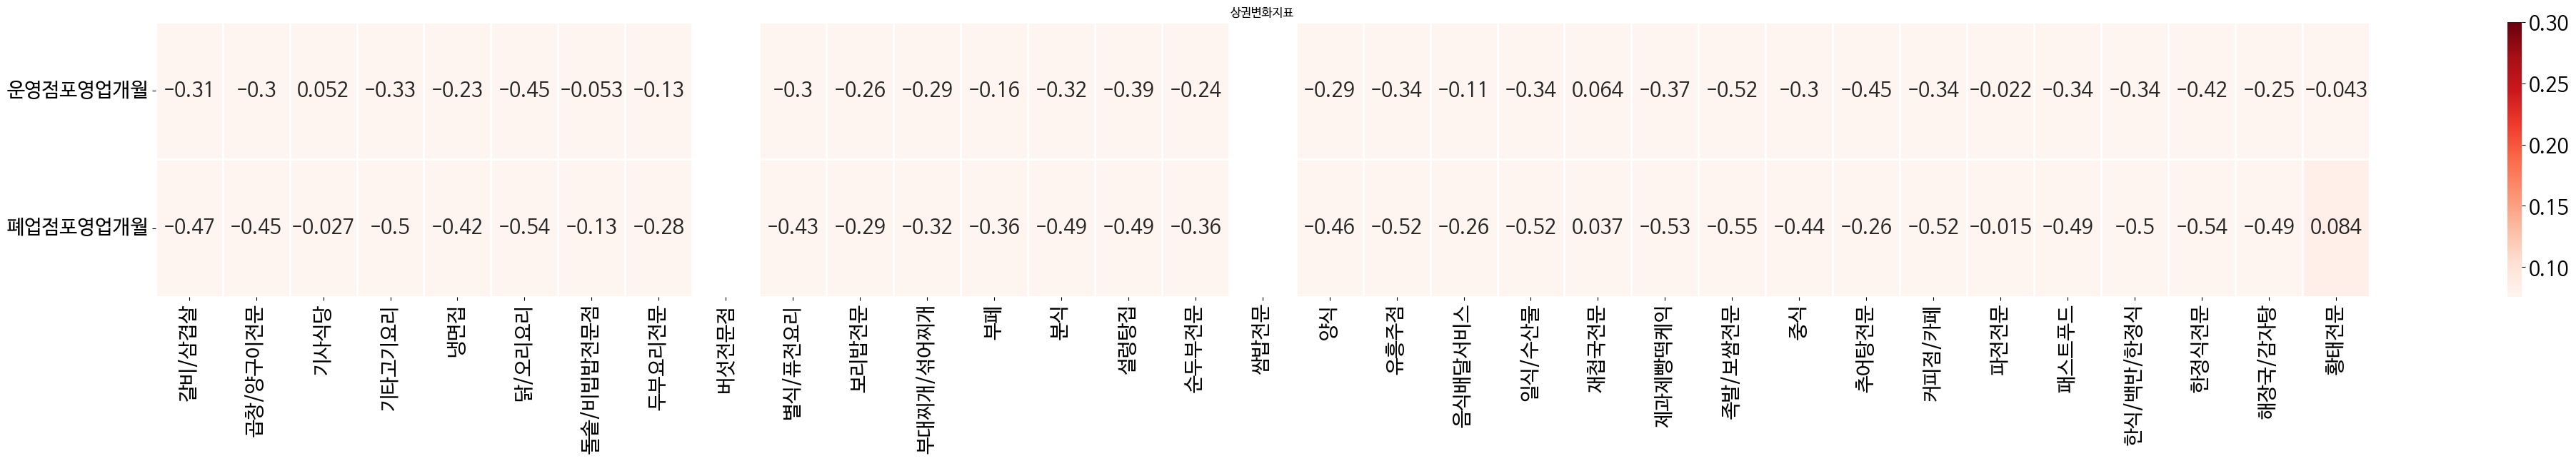

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

In [ ]:
result_change.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     1
기타고기요리       2
냉면집          1
닭/오리요리       2
별식/퓨전요리      1
부대찌개/섞어찌개    1
부페           1
분식           2
설렁탕집         2
순두부전문        1
양식           1
유흥주점         2
일식/수산물       2
제과제빵떡케익      2
족발/보쌈전문      2
중식           1
추어탕전문        1
커피점/카페       2
패스트푸드        2
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      1
Name: 변수, dtype: int64

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 변수들의 상당수가 각 업종들과의 상관계수가 0.3 이상이다.  
- 서울시 전체와 다르게 **강남구**에서는 상권변화지표 데이터는 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.

### **f) 주민등록인구**

In [ ]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,강남구,신사동,19,4,0,9,1,14,0,1,...,2,3,0,870,1569,4263,5235,1840,2165,15942
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,3,6,0,614,834,10127,6577,2167,1977,22296
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,1,6,0,986,1263,7565,6761,2202,2114,20891
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,0,4,0,1899,2706,5820,8665,3153,3704,25947
4,강남구,청담동,6,4,0,5,1,13,0,0,...,1,3,0,1867,2245,7380,8551,2960,2459,25462


In [ ]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,-0.319489,-0.374072,-0.092864,-0.332676,-0.056619,-0.179997,-0.186270,-0.234430,NaN,-0.292509,...,0.010335,-0.242033,0.338521,-0.222628,-0.499354,-0.185475,-0.224680,-0.165044,-0.210624,-0.355349
10대,-0.282761,-0.318845,-0.018341,-0.321519,0.056838,-0.174847,-0.034848,-0.213245,NaN,-0.230642,...,0.003933,-0.192224,0.217320,-0.199283,-0.268964,-0.156838,-0.220194,-0.086602,-0.200573,-0.230651
20 ~ 30대,0.687328,0.733824,-0.064066,0.587896,0.328496,0.813756,0.484425,0.576924,NaN,0.659670,...,0.852077,0.661344,0.573765,0.720968,-0.086823,0.739003,0.742044,0.664735,0.773848,-0.168620
40 ~ 50대,0.053459,0.036159,-0.047361,-0.013952,0.198925,0.198887,0.132801,0.040856,NaN,0.069466,...,0.376872,0.121118,0.433672,0.145238,-0.314854,0.180268,0.139846,0.183582,0.180229,-0.272587
60대,-0.140439,-0.127347,-0.058570,-0.205800,-0.174793,0.024363,-0.065732,-0.057920,NaN,-0.093901,...,0.122053,-0.133961,0.643824,-0.085818,-0.228249,-0.061039,-0.087682,-0.107889,-0.042546,-0.114348
70대 이상,-0.023100,-0.085764,-0.034327,-0.015693,0.046722,0.033179,-0.114038,-0.028725,NaN,-0.005323,...,0.152164,0.013073,0.556005,0.042876,-0.138977,0.036905,0.019934,-0.008230,0.045353,-0.037983
총인구,0.179683,0.174856,-0.062532,0.102475,0.189687,0.336362,0.191868,0.162289,NaN,0.193958,...,0.488655,0.223136,0.564116,0.262499,-0.281363,0.295782,0.262035,0.275543,0.300925,-0.255740


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.687328
1,갈비/삼겹살,10대 미만,-0.319489
2,곱창/양구이전문,20 ~ 30대,0.733824
3,곱창/양구이전문,10대,-0.318845
4,곱창/양구이전문,10대 미만,-0.374072
5,기타고기요리,20 ~ 30대,0.587896
6,기타고기요리,10대,-0.321519
7,기타고기요리,10대 미만,-0.332676
8,냉면집,20 ~ 30대,0.328496
9,닭/오리요리,20 ~ 30대,0.813756


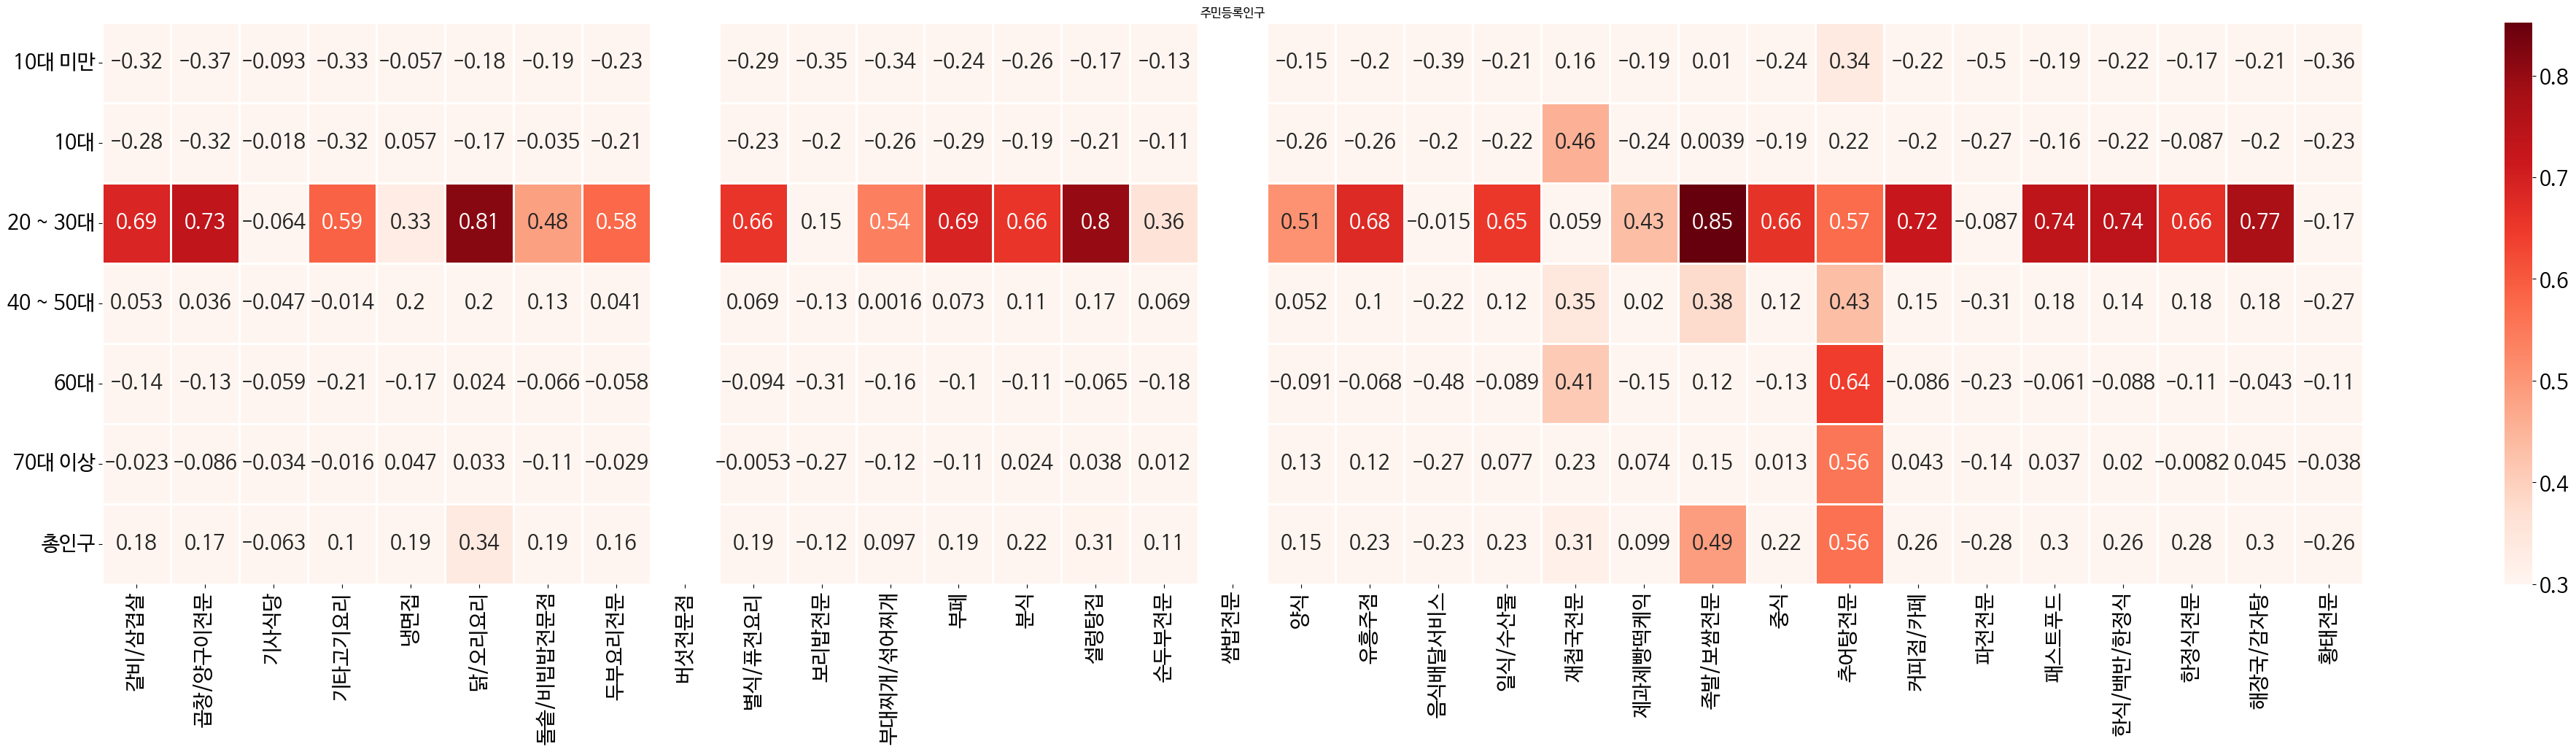

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [ ]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     3
기타고기요리       3
냉면집          1
닭/오리요리       2
돌솥/비빕밥전문점    1
두부요리전문       1
별식/퓨전요리      1
보리밥전문        2
부대찌개/섞어찌개    2
부페           1
분식           1
설렁탕집         2
순두부전문        1
양식           1
유흥주점         1
음식배달서비스      2
일식/수산물       1
재첩국전문        4
제과제빵떡케익      1
족발/보쌈전문      3
중식           1
추어탕전문        6
커피점/카페       1
파전전문         2
패스트푸드        1
한식/백반/한정식    1
한정식전문        1
해장국/감자탕      2
황태전문         1
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강남구**에서의 주민등록인구 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **g) 지하철**

In [ ]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,강남구,신사동,19,4,0,9,1,14,0,1,...,0,163,1,27,161,2,3,0,3,2
1,강남구,논현1동,32,11,0,6,1,27,1,0,...,0,152,0,26,232,3,6,0,2,2
2,강남구,논현2동,34,8,0,5,5,27,0,0,...,0,173,0,50,293,1,6,0,1,0
3,강남구,압구정동,22,3,0,5,3,11,0,0,...,0,171,0,38,209,0,4,0,1,0
4,강남구,청담동,6,4,0,5,1,13,0,0,...,0,128,0,19,209,1,3,0,1,0


In [ ]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.453806,0.414653,-0.287135,0.420061,0.306907,0.478363,0.253874,0.542366,NaN,0.423427,...,0.430703,0.431612,-0.037273,0.522131,0.090688,0.481467,0.462481,0.340332,0.572212,1.125679e-17
역(환승역),0.394797,0.377760,-0.156953,0.399035,0.346705,0.416381,0.197645,0.482485,NaN,0.342092,...,0.354597,0.371805,0.067913,0.457448,0.156977,0.426067,0.400975,0.400682,0.585227,3.694845e-02


In [ ]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,역(전체),0.453806
1,갈비/삼겹살,역(환승역),0.394797
2,곱창/양구이전문,역(전체),0.414653
3,곱창/양구이전문,역(환승역),0.377760
4,기타고기요리,역(전체),0.420061
5,기타고기요리,역(환승역),0.399035
6,냉면집,역(환승역),0.346705
7,냉면집,역(전체),0.306907
8,닭/오리요리,역(전체),0.478363
9,닭/오리요리,역(환승역),0.416381


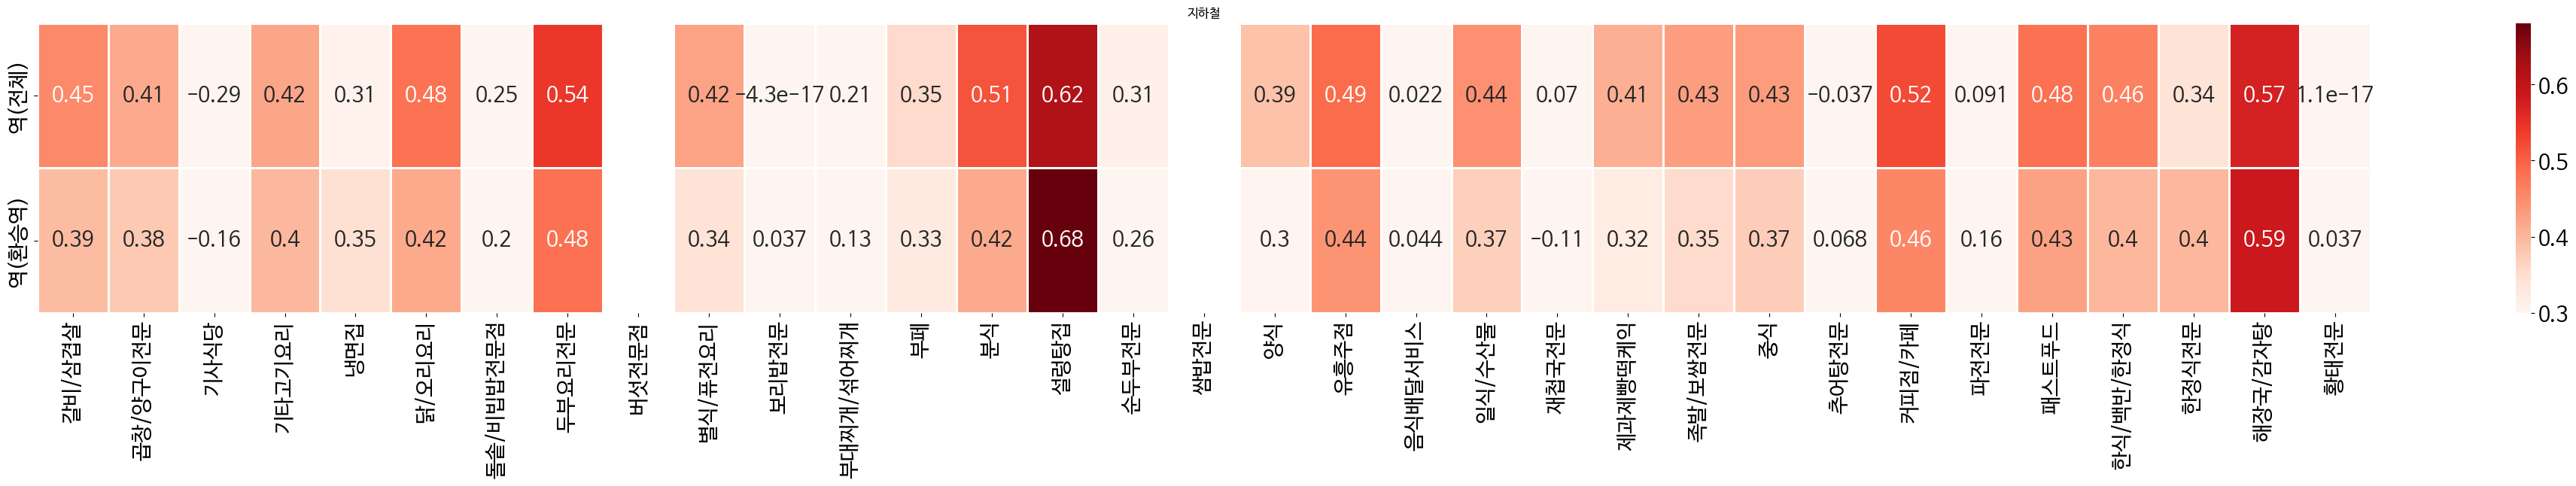

In [ ]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

In [ ]:
result_subway.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     2
기타고기요리       2
냉면집          2
닭/오리요리       2
두부요리전문       2
별식/퓨전요리      2
부페           2
분식           2
설렁탕집         2
순두부전문        1
양식           2
유흥주점         2
일식/수산물       2
제과제빵떡케익      2
족발/보쌈전문      2
중식           2
커피점/카페       2
패스트푸드        2
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      2
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 거의 모든 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 지하철 데이터의 경우 거의 모든 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **강남구**에서의 지하철 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.